## Goal
Create a simple LED cube visualization based on 3D scatterplots which can be used to create visualization tests until hardware is available

In [3]:
using Plots
using Colors

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1252


ArgumentError: ArgumentError: Package Colors not found in current path:
- Run `import Pkg; Pkg.add("Colors")` to install the Colors package.


In [ ]:
plotlyjs();

┌ Info: Precompiling PlotlyJS [f0f68f2c-4968-5e81-91da-67840de0976a]
└ @ Base loading.jl:1252
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **



In [ ]:
mutable struct Cube
    vels
    pitches
    size
end

In [ ]:
mutable struct Note
    pitch
    velocity
    left_right
end

In [ ]:
"""
Adds a note into a cube for visualization
"""
function add_note!(c::Cube, n::Note)
    left_right = Int(round(n.left_right*5/127)) + 1 
    octave = clamp((n.pitch ÷ 12) - 1, 1, 6)
    # for now, just make a stack on the depth axis
    for j=1:c.size
        if c.vals[left_right, j, octave] == 0
            c.vals[left_right, j, octave] = n.velocity
            break
        end
    end
end

In [ ]:
rand_midi() = abs(rand(Int))%127

In [ ]:
s = 6 
c = Cube(zeros(s, s, s), s)

In [ ]:
ns = [Note(rand_midi(), rand_midi(), rand_midi()) for i=1:10]

In [ ]:
[add_note!(c, n) for n in ns]

In [ ]:
function plot_cube(c::Cube, cmap)
    cgrid = [(x, y, z) for x=0:c.size, y=0:c.size, z=0:c.size];
    cgrid = collect(zip(cgrid...));
    cgrid = [collect(x) for x in cgrid];
    colors = reshape(cmap.(c.vals), (length(c.vals), 1))
    return scatter3d(plgrid..., markercolor=colors, legend=nothing,
        xlabel="left_right",
        ylabel="note stack"
        zlabel="octave",
    )
end

In [ ]:
function val_to_hue(val)
    return HSV(Int(round(val*360/127)), 0.8, 0.8)
end

In [ ]:
plot_cube(c, val_to_hue)

# Scratch

In [205]:
cols = [HSV(i, 0.8, 0.8) for i=range(0,step=1,length=360)];
cols = reshape(cols, (10, 36))

In [206]:
using Random

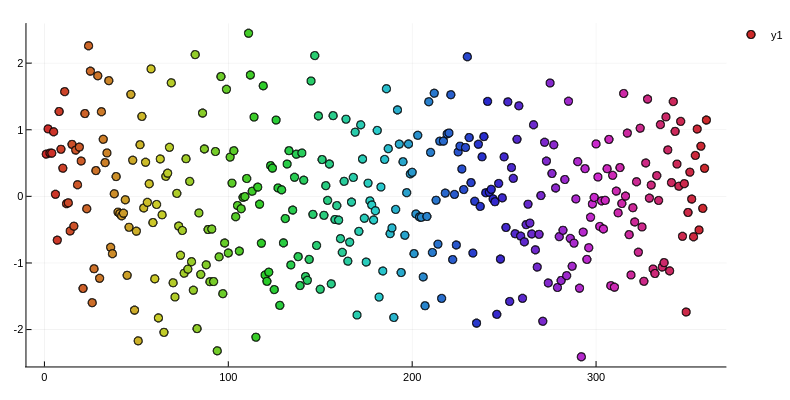

In [207]:
scatter(1:360, randn((360)), markercolor=reshape(cols, (length(cols), 1)))

In [ ]:
s = 6 
c = Cube(zeros(s, s, s), s)

In [ ]:
n = Note(50, 127, 64)

In [ ]:
add_note!(c, n)